# This document will walk you through some Jupyter basics all the way up through basic statistical analyses and plotting 

## Markdown in Juptyer
One of the nicest features of Juptyer Notebooks is that they allow you in embed Markdown code _right in side_ them. This means you can write notes, like this one, as if you were on GitHub, using RMarkdown, or Atom. This lets you
   * use _italics_ and **bolds**
   * `inline code` and 
   ```
   code chunks
   ```
   * embedded links
   * inline ploting
   * insert images
   
and much more.

You open up Juptyer by simply typing
```
$ jupyter notebook
```

in your terminal. It should take you to a familiar looking place, namely the directory you opened it from. From here you can peruse your directories to find an already created notebook (denoted by a `.ipynb` extension`) or click the 'New' button in the top left. The dropdown menu lets you choose which _kernel_ to open within Jupyter, for now we'll just use Python3 but you can install over 70 other kernels, including

 * multiple Python environments (i.e. 2, 2.7.2, 3, etc.)
 * terminal
 * R
 * Julia
 * Matlab
 * Perl

## Jupyter basics
In Jupyter there are a few basic commands that will be useful right away.

To enter Command Modem press `<esc>`. Now you can
* create a new cell, `<B>`
* change a cell to Markdown, `<M>`, or code, `<Y>`
* delete a highlighted cell, `<X>`
* _undo_ a deletion with `<Z>`
        
Enter back into Edit Mode by hitting `<enter>` or clicking a cell. Within a cell, in edit mode, all of the normal shortcuts (copy, paste, undo, etc.) work just as you expect. No more `%paste`!

#### Most importantly, you _run_ a cell (be it code or Markdown) with `<shift>+<enter>`

In [1]:
1+1

2

Jupyter evaluates _**individual**_ cells, similar to the 'highlight-and-run' style of RStudio. This makes the entensions offered by iPhython even more powerful and easier to operate. For example, since we only want to load modules once, we can enter them in a single cell one time, run it, and move on.

##### Infinite loops
If you accidently make an infinite loop, or some process that takes a very long time, you can interrupt it by hitting the stop button above (black square), or the kernel dropdown menu. Note that this may take a little while to stop.

#### In Juptyer, _all_ of your familiar Python will function the same*
*...with the exception of `sys`, because we are not reading in from the command line. More about this later.

In [2]:
# Here are our familiar modules
import pandas as pd
import numpy as np
import sys
import re # you may have used this to do complicated string splitting

Let's add a new module, `matplotlib`, specifically only a group of methods, `matplotlib.pyplot`, for plotting. Furthermore, we'll specify that we want our plot _inline_ (not to open up in a new window) and that we'd like `matplotlib` to change its default style to that of `ggplot` (if you're familiar with plotting in R).

In [32]:
%matplotlib inline 
import matplotlib # import matplotlib
matplotlib.style.use('ggplot') # change style to ggplot
import matplotlib.pyplot as plt # allow us to call pyplot methods as 'plt'

### Typical work flow
1. **Goal**: take fasta file and visualize some data
2. **Input**: fasta file
3. **Output**: python script, figures, data table for future use
4. **How?**

 i. Define function to convert fasta file to pd.DataFrame
  * must separate metadata fields
  * pair metadata and sequence
  * input the above into a dataframe
        
 ii. Run function on file
    
 iii. Calculate some stats (e.g. GC-concent, base frequency) and add them to dataframe 
    
 iv. make figures
 
 v. export figures and data table
 
 vi. download script as Python file
     * remember to change `sys` statements where needed

Here's my path to the `sequences.fasta` file from HW4

In [3]:
path = '/Users/IanGilman/github/CompSkillsF16/Homework/Resources/sequences.fasta'

##### What does this stuff look like?

In [4]:
with open(path) as my_fasta_file:
    fastadata = my_fasta_file.readlines()
fastadata

['>MISEQ:7:000000000-AMAKG:1:1101:16998:1719 1:N:0:PE716:ST6_21 TTGACCCT|0|TAGACCTA|0 ST6_21_F|0|23|\n',
 'TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTATCATGACCTCTTAATGTTTACCCACTTTCTTAGTAATTTTGTATAAACACATCCTTCTATTTTAAAAGTACAAGAAATGCAATATGTTATTATACATTAAAATTTTAAGTTAGTTTCTATAGTGTTAGTTCTTAAACCTATAATGTTTTTAATTAACATAGCTGACCTAGATTTCTGTAGGATAATGTTGCTGATTTCATTACATTTGCTAATCCTGGCTGTACTAAGCACC\n',
 '>MISEQ:7:000000000-AMAKG:1:1101:9172:1724 1:N:0:PE714:ST6_12 TTGACCCT|0|CTAGAACA|0 ST6_12_F|0|20|\n',
 'CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACACACACCAAAGACATACCTCCAATCGTTTCCCTTCCTACAATAGCAAACAGCTGCCCTTCTGTCTGGAAAAGAGACTACATGGTCATGCCCTATCATTCAACTCATTTATGCTTTGTACTGTTTAGTCTCACTACCAATCTTCTTAGTTTATTTTCATTCCCTTTCCCTGGTCTGATGGAGTTTATATGACTTATTTTTTTCAGAGCCATGATATATTCATTTTATTGATTTTTTTT\n',
 '>MISEQ:7:000000000-AMAKG:1:1101:17068:1733 1:N:0:ETU011:ST6_16 GTCGTGAT|0|CTAAGCCT|0 ST6_16_F|0|23|\n',
 'CGTCTGAACACTATTCAACACCATTAAATATAAACTCTGATATAAAAGATGACTACAGAACCATGTTTATAGACCTCGGTGATTTCAGTATCTGATTGTGTTTGATGCCT

Let's work with a smaller part of this dataset so squishing bugs is easier

In [5]:
minidata = fastadata[:10]
minidata

['>MISEQ:7:000000000-AMAKG:1:1101:16998:1719 1:N:0:PE716:ST6_21 TTGACCCT|0|TAGACCTA|0 ST6_21_F|0|23|\n',
 'TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTATCATGACCTCTTAATGTTTACCCACTTTCTTAGTAATTTTGTATAAACACATCCTTCTATTTTAAAAGTACAAGAAATGCAATATGTTATTATACATTAAAATTTTAAGTTAGTTTCTATAGTGTTAGTTCTTAAACCTATAATGTTTTTAATTAACATAGCTGACCTAGATTTCTGTAGGATAATGTTGCTGATTTCATTACATTTGCTAATCCTGGCTGTACTAAGCACC\n',
 '>MISEQ:7:000000000-AMAKG:1:1101:9172:1724 1:N:0:PE714:ST6_12 TTGACCCT|0|CTAGAACA|0 ST6_12_F|0|20|\n',
 'CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACACACACCAAAGACATACCTCCAATCGTTTCCCTTCCTACAATAGCAAACAGCTGCCCTTCTGTCTGGAAAAGAGACTACATGGTCATGCCCTATCATTCAACTCATTTATGCTTTGTACTGTTTAGTCTCACTACCAATCTTCTTAGTTTATTTTCATTCCCTTTCCCTGGTCTGATGGAGTTTATATGACTTATTTTTTTCAGAGCCATGATATATTCATTTTATTGATTTTTTTT\n',
 '>MISEQ:7:000000000-AMAKG:1:1101:17068:1733 1:N:0:ETU011:ST6_16 GTCGTGAT|0|CTAAGCCT|0 ST6_16_F|0|23|\n',
 'CGTCTGAACACTATTCAACACCATTAAATATAAACTCTGATATAAAAGATGACTACAGAACCATGTTTATAGACCTCGGTGATTTCAGTATCTGATTGTGTTTGATGCCT

Me trying to figure out how to split the first line...

In [6]:
t0 = fastadata[0]
t0.split()

['>MISEQ:7:000000000-AMAKG:1:1101:16998:1719',
 '1:N:0:PE716:ST6_21',
 'TTGACCCT|0|TAGACCTA|0',
 'ST6_21_F|0|23|']

In [7]:
t1 = re.split(r":", t0)
t1

['>MISEQ',
 '7',
 '000000000-AMAKG',
 '1',
 '1101',
 '16998',
 '1719 1',
 'N',
 '0',
 'PE716',
 'ST6_21 TTGACCCT|0|TAGACCTA|0 ST6_21_F|0|23|\n']

In [8]:
re.split(r"\|" t1[-1])

SyntaxError: invalid syntax (<ipython-input-8-032bc000abe4>, line 1)

The errors look just like iPython because this _is_ iPython. Here's a syntax error, I forgot a comma.

In [9]:
re.split(r"\|", t1[-1])

['ST6_21 TTGACCCT', '0', 'TAGACCTA', '0 ST6_21_F', '0', '23', '\n']

In [10]:
re.split(r"[>:| ]", t0)

['',
 'MISEQ',
 '7',
 '000000000-AMAKG',
 '1',
 '1101',
 '16998',
 '1719',
 '1',
 'N',
 '0',
 'PE716',
 'ST6_21',
 'TTGACCCT',
 '0',
 'TAGACCTA',
 '0',
 'ST6_21_F',
 '0',
 '23',
 '\n']

##### Yes! This is what I want
Can we split all the lines?

In [11]:
for line in minidata:
    if line.startswith(">"):
        print re.split(r"[>:| ]", line)

['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '16998', '1719', '1', 'N', '0', 'PE716', 'ST6_21', 'TTGACCCT', '0', 'TAGACCTA', '0', 'ST6_21_F', '0', '23', '\n']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '9172', '1724', '1', 'N', '0', 'PE714', 'ST6_12', 'TTGACCCT', '0', 'CTAGAACA', '0', 'ST6_12_F', '0', '20', '\n']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '17068', '1733', '1', 'N', '0', 'ETU011', 'ST6_16', 'GTCGTGAT', '0', 'CTAAGCCT', '0', 'ST6_16_F', '0', '23', '\n']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '20217', '1738', '1', 'N', '0', 'ETR208', 'ST6_10', 'ACCACTGT', '0', 'TGCTCTGA', '1', 'ST6_10_F', '0', '22', '\n']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '9687', '1743', '1', 'N', '0', 'PE731', 'ST6_25', 'CCACTCCT', '0', 'TAGGAGTA', '1', 'ST6_25_F', '0', '20', '\n']


How about splitting and creating a list?

In [13]:
for i, line in enumerate(minidata):
    if line.startswith(">"):
        sequence = minidata[i+1].replace("\n", "")
        #print sequence
        splitline = re.split(r"[>:| ]", line)
        #print splitline
        splitline.append(sequence)
        print splitline

['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '16998', '1719', '1', 'N', '0', 'PE716', 'ST6_21', 'TTGACCCT', '0', 'TAGACCTA', '0', 'ST6_21_F', '0', '23', '\n', 'TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTATCATGACCTCTTAATGTTTACCCACTTTCTTAGTAATTTTGTATAAACACATCCTTCTATTTTAAAAGTACAAGAAATGCAATATGTTATTATACATTAAAATTTTAAGTTAGTTTCTATAGTGTTAGTTCTTAAACCTATAATGTTTTTAATTAACATAGCTGACCTAGATTTCTGTAGGATAATGTTGCTGATTTCATTACATTTGCTAATCCTGGCTGTACTAAGCACC']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '9172', '1724', '1', 'N', '0', 'PE714', 'ST6_12', 'TTGACCCT', '0', 'CTAGAACA', '0', 'ST6_12_F', '0', '20', '\n', 'CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACACACACCAAAGACATACCTCCAATCGTTTCCCTTCCTACAATAGCAAACAGCTGCCCTTCTGTCTGGAAAAGAGACTACATGGTCATGCCCTATCATTCAACTCATTTATGCTTTGTACTGTTTAGTCTCACTACCAATCTTCTTAGTTTATTTTCATTCCCTTTCCCTGGTCTGATGGAGTTTATATGACTTATTTTTTTCAGAGCCATGATATATTCATTTTATTGATTTTTTTT']
['', 'MISEQ', '7', '000000000-AMAKG', '1', '1101', '17068', '1733', '1', 'N', '0', 'ETU011', 'ST6_16', '

Now, putting everything together, let's create teh final output we'd like our function to produce and see if it works with our small data set.

In [18]:
sample_lists = []
for i, line in enumerate(minidata):
    if line.startswith(">"):
        splitline = re.split(r"[>:| ]", line)
        sample = splitline[11]
        country = re.sub(r'\d+', '', sample)
        f_primer = splitline[13]
        r_primer = splitline[15]
        locus = splitline[12]
        sequence = minidata[i+1].replace("\n", "")

        temp = [sample, country, f_primer, r_primer, locus, sequence]
        sample_lists.append(temp)

In [17]:
pd.DataFrame(sample_lists, columns=['Sample Id', 'Country', 'F Primer', 'R Primer', 'Locus', 'Sequence'])

,Sample Id,Country,F Primer,R Primer,Locus,Sequence
0,PE716,PE,TTGACCCT,TAGACCTA,ST6_21,TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTA...
1,PE714,PE,TTGACCCT,CTAGAACA,ST6_12,CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACAC...
2,ETU011,ETU,GTCGTGAT,CTAAGCCT,ST6_16,CGTCTGAACACTATTCAACACCATTAAATATAAACTCTGATATAAA...
3,ETR208,ETR,ACCACTGT,TGCTCTGA,ST6_10,TAAAGCAAATGTCCAATATTTATTTATTGAGAGTTTTTTAGTGCAA...
4,PE731,PE,CCACTCCT,TAGGAGTA,ST6_25,ATTCTTCTATGTGCTTCAGGTATTTAAATGCATTTAGTCCTCCCAA...


#### Finally, we're ready to define our function. Copy, paste, and change a few variable names.

In [19]:
def fasta_to_df(fasta_file_path):
    sample_lists = []
    with open(fasta_file_path) as my_fasta_file:
        fasta_lines = my_fasta_file.readlines()
        for i, line in enumerate(fasta_lines):
            if line.startswith(">"):
                splitline = re.split(r"[>:| ]", line)
                sample = splitline[11]
                country = re.sub(r'\d+', '', sample)
                f_primer = splitline[13]
                r_primer = splitline[15]
                locus = splitline[12]
                sequence = fasta_lines[i+1].replace("\n", "")

                sample_lists.append([sample, country, f_primer, r_primer, locus, sequence])
    return pd.DataFrame(sample_lists, columns=['Sample Id', 'Country', 'F Primer', 'R Primer', 'Locus', 'Sequence'])

Now to run it on our full dataset

In [21]:
fastaDF = fasta_to_df(path)

In [22]:
fastaDF[:10]

,Sample Id,Country,F Primer,R Primer,Locus,Sequence
0,PE716,PE,TTGACCCT,TAGACCTA,ST6_21,TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTA...
1,PE714,PE,TTGACCCT,CTAGAACA,ST6_12,CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACAC...
2,ETU011,ETU,GTCGTGAT,CTAAGCCT,ST6_16,CGTCTGAACACTATTCAACACCATTAAATATAAACTCTGATATAAA...
3,ETR208,ETR,ACCACTGT,TGCTCTGA,ST6_10,TAAAGCAAATGTCCAATATTTATTTATTGAGAGTTTTTTAGTGCAA...
4,PE731,PE,CCACTCCT,TAGGAGTA,ST6_25,ATTCTTCTATGTGCTTCAGGTATTTAAATGCATTTAGTCCTCCCAA...
5,GBR320,GBR,TCCTGGGT,TAGATCGC,FUT3_3,GGCCTTTCCACATCCCTGTGGCTCTGTCCCGCTTTTCAGAGATGGT...
6,SW903,SW,TCTCCGGA,CTAGAACA,ST6_16,CGTCTGAACACTATTCAACACCTTTAAATATAAACTCTGATATAAT...
7,ETR228,ETR,TGGATCTG,TAAGTTCC,ST6_25,ATTCTTCTATGTGCTTCAGGTATATAAATGCATTTAGTCCTCCCAA...
8,SP839,SP,TCTCCGGA,TAGGAGTA,ST6_21,ATATTGCCTTGCACACAATAGGTGCTCAATAAATGTCTTTTTTTTA...
9,GN517,GN,GTGTGGTG,GTAAGGAG,ST6_21,ATAGTGCCTTGCACACGTTAGGTGCTCAATAAATGTCTGTCGTTGA...


I thought it looked pretty good until I checked the countries and found the following:

In [24]:
set(fastaDF.Country)

{'ETR',
 'ETR_',
 'ETU',
 'GBR',
 'GBU',
 'GN',
 'KE',
 'PE',
 'SP',
 'SW',
 'USW',
 'USW__'}

Clearly there was a problem in the `Country` column that did remove the '_'. So here's a quick fix (ideally we'd go back and change the function definition).

In [26]:
fastaDF['Country'] = [re.sub("_", "", country) for country in fastaDF.Country]
set(fastaDF.Country)

{'ETR', 'ETU', 'GBR', 'GBU', 'GN', 'KE', 'PE', 'SP', 'SW', 'USW'}

Now we can add columns for each base frequency

In [27]:
fastaDF['Sequence Length'] = [len(line) for line in fastaDF.Sequence]

In [28]:
def base_frequency(DF, sequences, nucs = ['A', 'C', 'G', 'T']):
    for base in nucs:
        DF['Freq'+ base] = [seq.count(base)/float(len(seq)) for seq in sequences]
        
    return DF

In [29]:
base_frequency(fastaDF, fastaDF.Sequence)[:10]

,Sample Id,Country,F Primer,R Primer,Locus,Sequence,Sequence Length,FreqA,FreqC,FreqG,FreqT
0,PE716,PE,TTGACCCT,TAGACCTA,ST6_21,TTAGTTCCTTGCACACAATAGTTGCTCAATATATGTCTGTTGTTTA...,278,0.298561,0.161871,0.125899,0.413669
1,PE714,PE,TTGACCCT,CTAGAACA,ST6_12,CCTCTTCCCCAGCCTCTCCACACAAAAACACATGATACACCCACAC...,281,0.256228,0.274021,0.110320,0.359431
2,ETU011,ETU,GTCGTGAT,CTAAGCCT,ST6_16,CGTCTGAACACTATTCAACACCATTAAATATAAACTCTGATATAAA...,278,0.280576,0.241007,0.154676,0.323741
3,ETR208,ETR,ACCACTGT,TGCTCTGA,ST6_10,TAAAGCAAATGTCCAATATTTATTTATTGAGAGTTTTTTAGTGCAA...,279,0.258065,0.136201,0.179211,0.426523
4,PE731,PE,CCACTCCT,TAGGAGTA,ST6_25,ATTCTTCTATGTGCTTCAGGTATTTAAATGCATTTAGTCCTCCCAA...,281,0.274021,0.206406,0.174377,0.345196
5,GBR320,GBR,TCCTGGGT,TAGATCGC,FUT3_3,GGCCTTTCCACATCCCTGTGGCTCTGTCCCGCTTTTCAGAGATGGT...,281,0.163701,0.409253,0.181495,0.245552
6,SW903,SW,TCTCCGGA,CTAGAACA,ST6_16,CGTCTGAACACTATTCAACACCTTTAAATATAAACTCTGATATAAT...,278,0.197842,0.262590,0.104317,0.435252
7,ETR228,ETR,TGGATCTG,TAAGTTCC,ST6_25,ATTCTTCTATGTGCTTCAGGTATATAAATGCATTTAGTCCTCCCAA...,281,0.284698,0.209964,0.174377,0.330961
8,SP839,SP,TCTCCGGA,TAGGAGTA,ST6_21,ATATTGCCTTGCACACAATAGGTGCTCAATAAATGTCTTTTTTTTA...,278,0.302158,0.154676,0.136691,0.406475
9,GN517,GN,GTGTGGTG,GTAAGGAG,ST6_21,ATAGTGCCTTGCACACGTTAGGTGCTCAATAAATGTCTGTCGTTGA...,278,0.287770,0.165468,0.165468,0.381295


In [30]:
fastaDF.describe()

,Sequence Length,FreqA,FreqC,FreqG,FreqT
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,280.279500,0.268858,0.240080,0.214397,0.276665
std,1.468148,0.067085,0.067014,0.050811,0.067774
min,276.000000,0.064057,0.117438,0.104317,0.096085
25%,279.000000,0.224199,0.177936,0.174377,0.231317
50%,281.000000,0.272401,0.235507,0.213523,0.274021
75%,281.000000,0.330935,0.295374,0.243816,0.327402
max,284.000000,0.533808,0.409253,0.348754,0.604982


## Plotting
Plotting in Python (and Jupyter) is relatively straightforward, although like any language the fine details might take a little while to iron out. The `DataFrame.plot` method has a number of built in plot types such bar, pie, scatter, and historgram. Here's quick historgram of the sequence frequency of the A nuceotide.

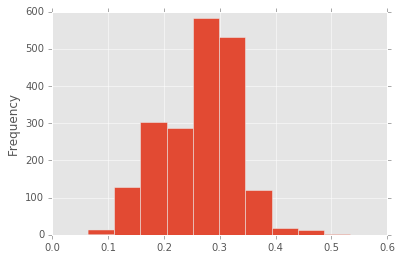

In [33]:
fastaDF.FreqA.plot.hist()

Let's increase the number of bins, change the color to yellow with the `color` option, make a it a little transparent (`alpha`), and larger (`figsize`).

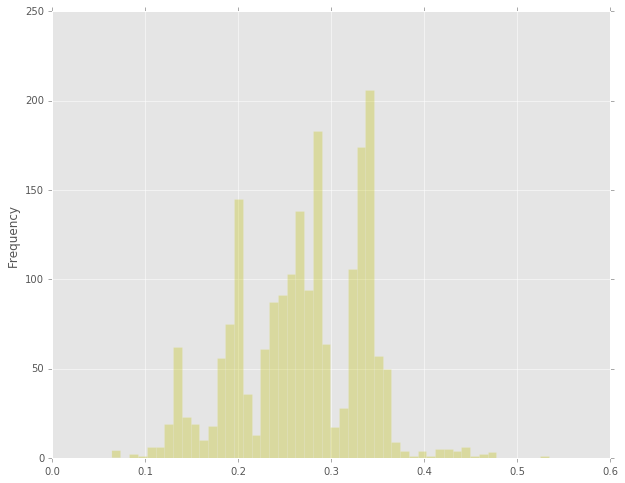

In [35]:
fastaDF.FreqA.plot.hist(bins=50, 
                            color = 'y', 
                            alpha=0.3, 
                            figsize = (10,8))

Now we can overlay all of the nucleotide frequencies, add an outline for visibility (`edgecolor`) and save it. Remember that Python works from top to bottom, so if we start a plot in a cell it will keep adding to it until the cell ends or we tell it to stop. I'm going to open up a plot called 'base_histogran' and add a few plots to it. At the end I save the plot by using the `get_figure` and `savefig` methods.

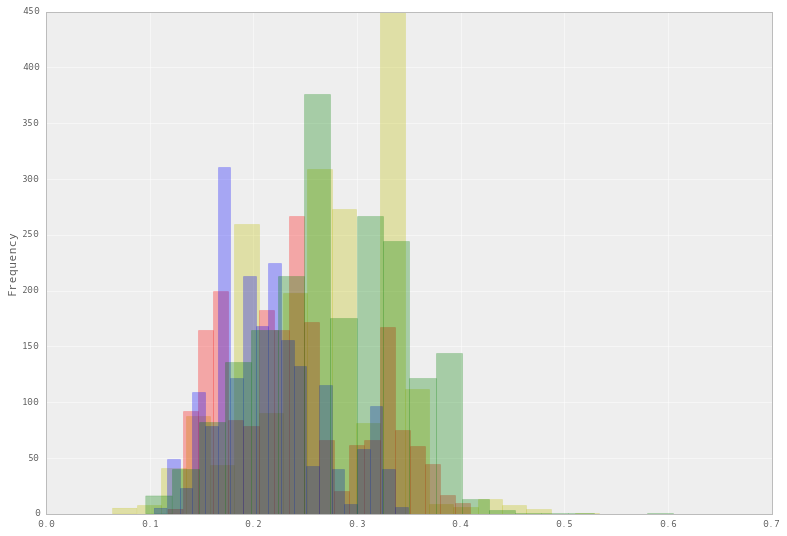

In [50]:
base_histogram = fastaDF.FreqA.plot.hist(alpha=0.3, 
                                             color = 'y', 
                                             edgecolor = 'y', 
                                             figsize = (13,9), 
                                             bins=20)

fastaDF.FreqC.plot.hist(alpha=0.3, color = 'r', edgecolor = 'r', figsize = (13,9), bins=20)
fastaDF.FreqG.plot.hist(alpha=0.3, color = 'b', edgecolor = 'b', figsize = (13,9), bins=20)
fastaDF.FreqT.plot.hist(alpha=0.3, color = 'g', edgecolor = 'g', figsize = (13,9), bins=20)

base_histogram_fig = base_histogram.get_figure()
base_histogram_fig.savefig('./base_freq_histogram.pdf')

A very popular plot in R is the scatter plot matrix, which produces a matrix of all-by-all variable scatter plots. Pandas has one too:

In [42]:
from pandas.tools.plotting import scatter_matrix

These next two line sets the colors to be plotted by the country

In [43]:
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(fastaDF.Country), color_type='random')

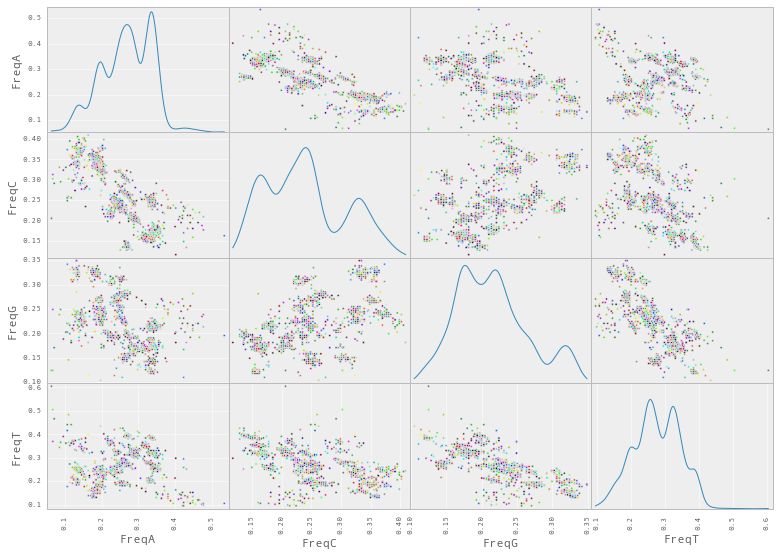

In [47]:
base_scatter = scatter_matrix(fastaDF[['FreqA', 'FreqC', 'FreqG', 'FreqT']], 
                              alpha=1, 
                              figsize=(13, 9), 
                              diagonal='kde', # this changes the diagonal blocks from historgrams to lines
                              c= colors)

### Saving script as Python file and modifying for `sys` input
As you may have noticed, this file is a `.ipynb` file, _not_ a `.py` file. Not everyone may be able to run this, so it is usually a good idea to save a Python copy when you are done. Furthermore, we'd like to be able to include I/O such as input using `sys.argv`. To do this we'll
1. Save as a `.py` file 
 * using the dropdown 'File' menu > 'Download as Python' will save as `.py.html`
 * in terminal
 ```
 $ jupyter nbconvert --to script <YOUR_NOTEBOOK>.ipynb
 ```
 will save as `.py`
2. Open the `.py` file in an external editor
 * There may be some incongruencies after running it in terminal. This code in particular is mostly junk that should be suppressed and even a few errors I left in on purpose. 
3. Replace instances where we want to use I/O
 * You can do this in Jupyter, but I personally like to have a Jupyter file that I can return to and edit